In [1]:
from PIL import Image
from IPython.display import display
import numpy as np
import os

In [2]:
ims = {f.split('.')[0]: Image.open('library/'+f) for f in os.listdir('library') if f.endswith('.png')}


In [26]:
basis = [
    ims['library1'], ims['library2'], ims['library3'],
    ims['4-7'], ims['10-7'],
]
basis.append(Image.blend(ims['2-3'], basis[3], -10))
basis.append(Image.blend(Image.blend(basis[0], ims['2-7'],1.5), basis[5], -2))
basis.append(Image.blend(Image.blend(ims['10-5'], basis[5], -0.7), basis[6], -1))
basis.append(Image.blend(Image.blend(ims['2-5'], basis[5], -0.7), basis[3], -0.8))
basis.append(Image.blend(ims['21-8'], basis[0], -1))

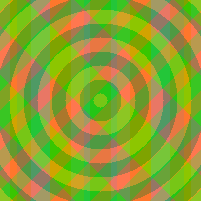

In [46]:
ims['26-8']

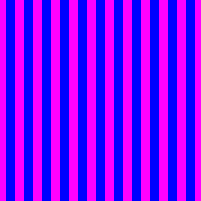

In [44]:
basis[8]

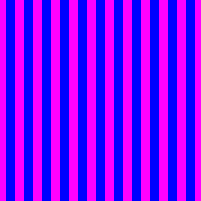

In [42]:
Image.blend(ims['26-2'], basis[8],0)

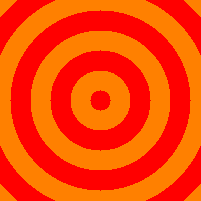

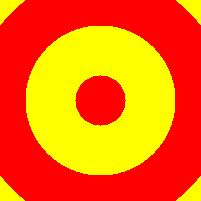

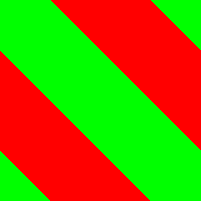

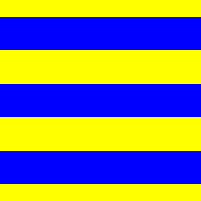

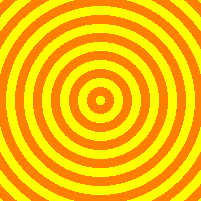

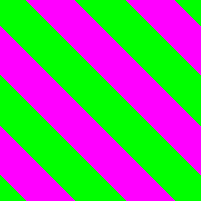

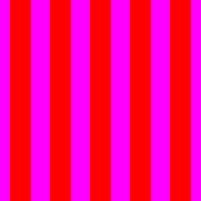

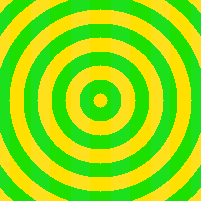

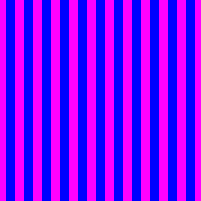

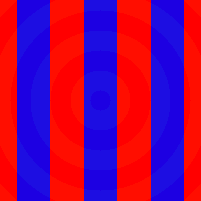

In [30]:
for im in basis:
    display(im)

13-5


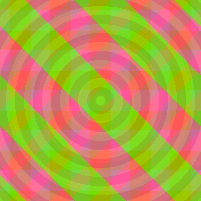

31-2


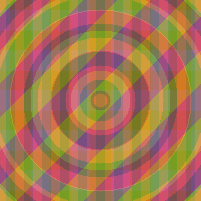

15-3


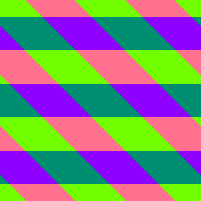

15-2


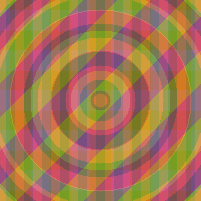

31-3


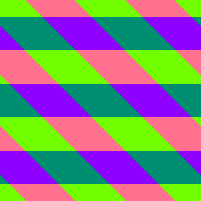

13-4


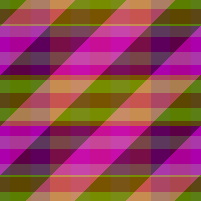

13-6


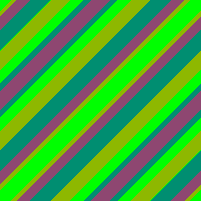

31-1


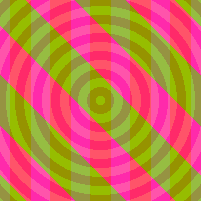

15-1


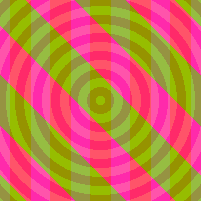

13-7


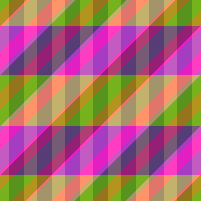

13-3


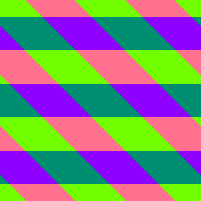

31-4


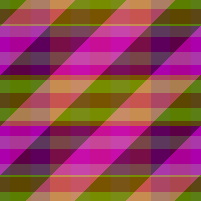

15-5


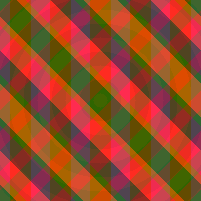

15-4


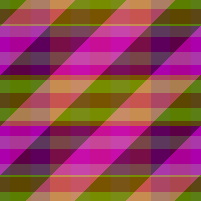

31-5


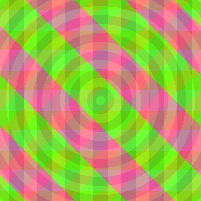

13-2


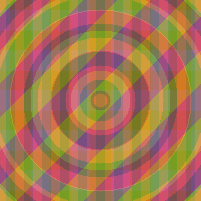

31-7


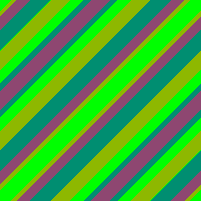

15-6


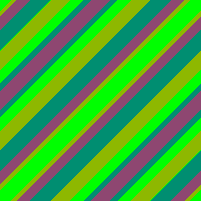

15-7


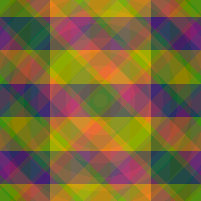

31-6


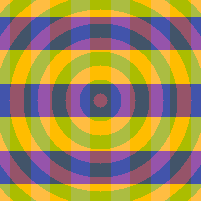

26-8


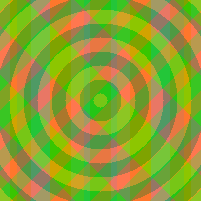

13-1


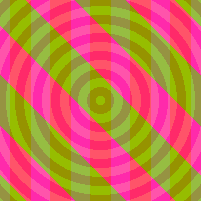

8-2


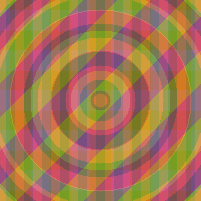

10-4


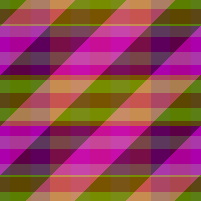

36-7


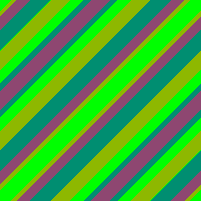

36-6


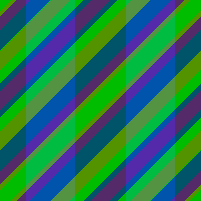

10-5


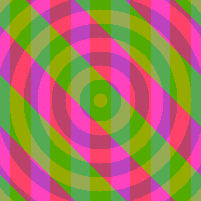

library-x2


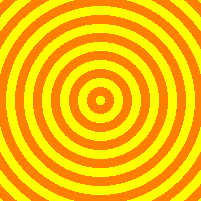

21-8


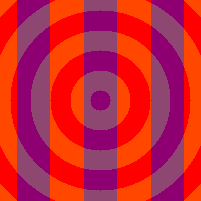

8-3


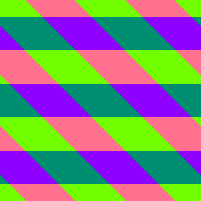

8-1


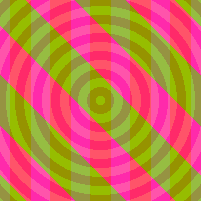

36-4


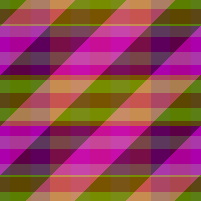

10-7


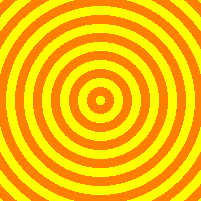

10-6


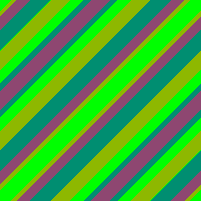

36-5


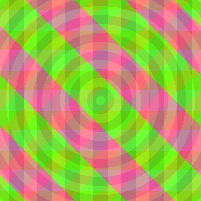

library-x1


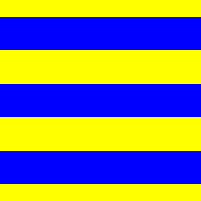

8-4


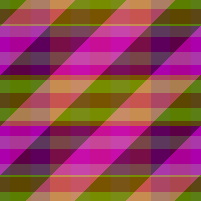

36-1


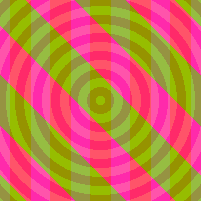

10-2


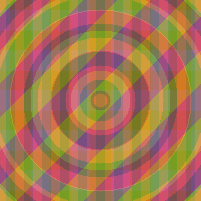

10-3


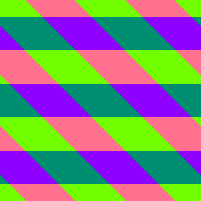

8-5


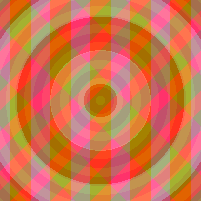

8-7


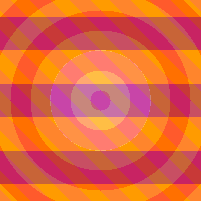

10-1


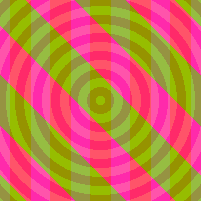

36-2


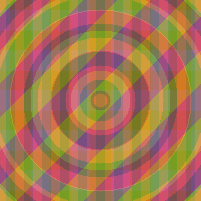

36-3


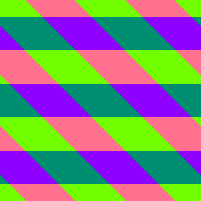

8-6


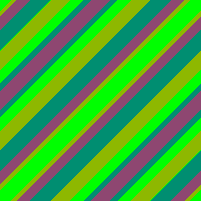

4-6


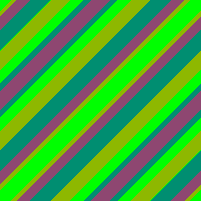

library3


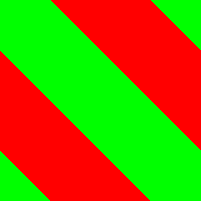

library2


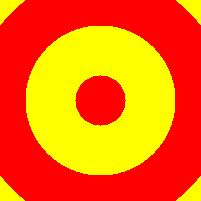

2-1


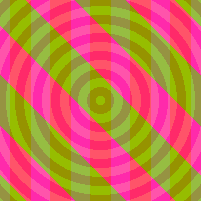

4-7


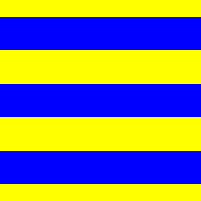

21-1


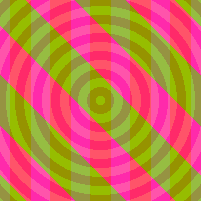

21-3


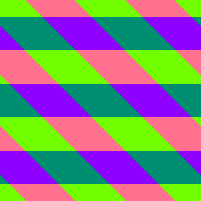

4-5


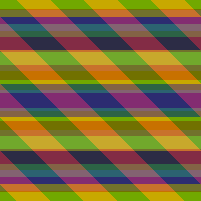

2-3


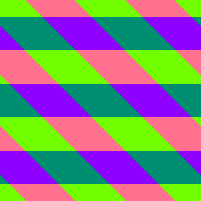

library1


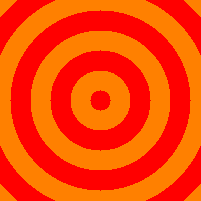

2-2


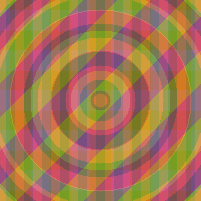

4-4


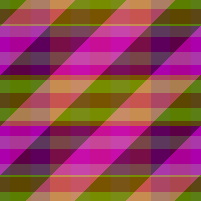

21-2


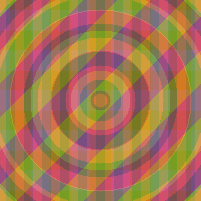

21-6


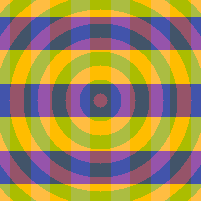

2-6


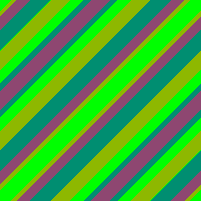

36-8


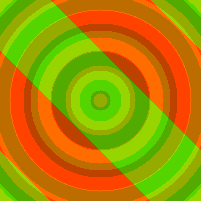

2-7


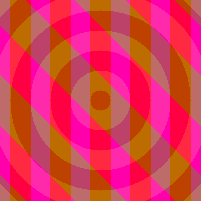

4-1


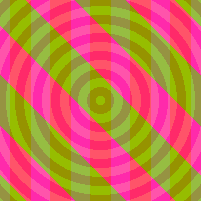

21-7


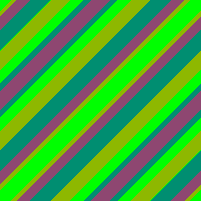

21-5


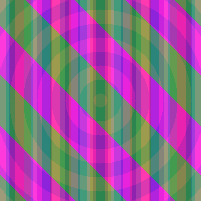

4-3


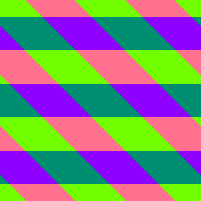

2-5


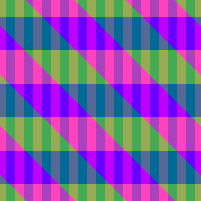

2-4


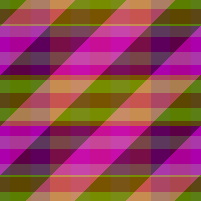

4-2


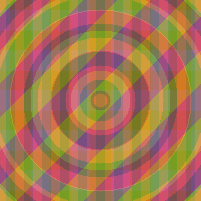

21-4


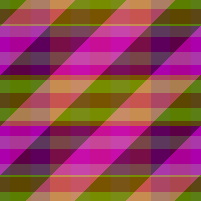

26-5


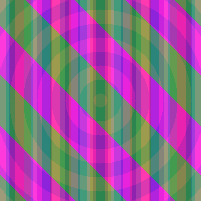

26-4


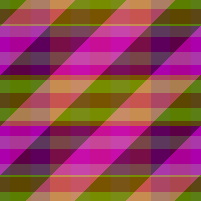

26-6


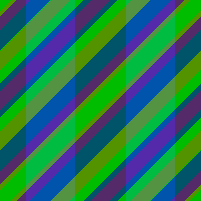

31-8


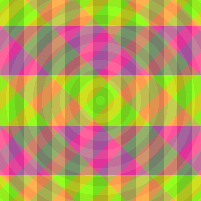

26-7


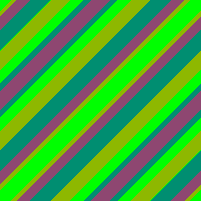

26-3


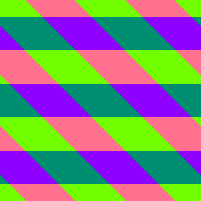

26-2


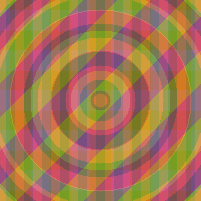

26-1


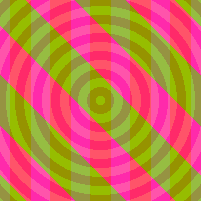

In [5]:
for key, im in ims.items():
    print(key)
    display(im)

In [6]:
def to_array(img):
    return np.array(img).flatten()

In [7]:
np.linalg.lstsq(np.stack([to_array(im) for im in basis], axis=1), to_array(ims["2-3"]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 3.33915984e-14, -4.38687520e-16,  7.98674016e-14,  4.43137255e-01,
        -8.24013585e-14,  5.56862745e-01, -3.11011612e-14, -2.90986009e-15,
         7.08298324e-17]),
 array([1.71933634e-17]),
 9,
 array([208268.24676711,  66461.71513446,  52547.35517214,  44386.54317734,
         37554.03392087,  31930.63419991,  25665.41684387,  19883.93834291,
         16025.87208813]))